The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.

Used GPU/TPU for training this algorithm because NCHW(channel first) is not supported on general CPU


#  Importing Libraries 


In [1]:
import numpy as np
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.datasets import mnist
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras import regularizers
import tensorflow as tf

###### NHWC to NCHW -> changing channel settings for keras



In [2]:
K.set_image_data_format("channels_first")
np.random.seed(0)

In [3]:
channels =1
height = 28
width =28


# Loading Dataset

In [4]:
(data_train,target_train), (data_test, target_test)= mnist.load_data()
print(data_train.shape)
print(target_train.shape)
print(data_test.shape)
print(target_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Exploring dataset and Pre processing

*   Changing shapes
*   Transformation
*   Converting output to categorical(one hot encoding) 






In [5]:
data_train.shape

(60000, 28, 28)

In [6]:
data_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [7]:
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

In [8]:
data_train.shape

(60000, 1, 28, 28)

In [9]:
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

print(data_test.shape)


(10000, 1, 28, 28)


In [10]:
feature_train = data_train /255
feature_test = data_test /255

print(feature_test)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 ...


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. 

In [11]:
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)

In [12]:
number_of_classes = target_test.shape[1]
print(number_of_classes)

10


# Sequential CNN

In [13]:
network = Sequential()

In [14]:
## layer1
network.add(Conv2D(filters=64,kernel_size=(5,5),input_shape=(channels,width,height), activation ='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.5))

network.add(Flatten())

##layer2
network.add(Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
network.add(Dropout(0.3))

##layer3
network.add(Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
network.add(Dropout(0.3))

## output layer
network.add(Dense(number_of_classes, activation="softmax"))

In [15]:
## opt = tf.keras.optimizers.RMSprop(learning_rate=0.5)
network.compile(loss="categorical_crossentropy",
                optimizer='rmsprop',
                metrics = ["accuracy"])

In [16]:
history = network.fit(feature_train,
                      target_train,
                epochs =20,
                verbose=1,
                batch_size=100,
                validation_data= (feature_test, target_test))

Epoch 1/20
600/600 [==============================] - 14s 5ms/step - loss: 0.9592 - accuracy: 0.8787 - val_loss: 0.4480 - val_accuracy: 0.9620
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.5140 - accuracy: 0.9307 - val_loss: 0.3765 - val_accuracy: 0.9661
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4555 - accuracy: 0.9388 - val_loss: 0.4086 - val_accuracy: 0.9438
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4222 - accuracy: 0.9432 - val_loss: 0.3481 - val_accuracy: 0.9617
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.4014 - accuracy: 0.9460 - val_loss: 0.3203 - val_accuracy: 0.9689
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3881 - accuracy: 0.9475 - val_loss: 0.2891 - val_accuracy: 0.9739
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3769 - accuracy: 0.9480 - val_loss: 0.3600 - val_accuracy: 0.9492
Epoch

In [17]:
# get training and testing loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

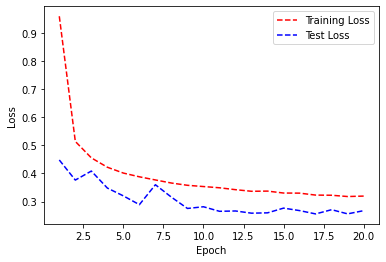

In [18]:
# visualise loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

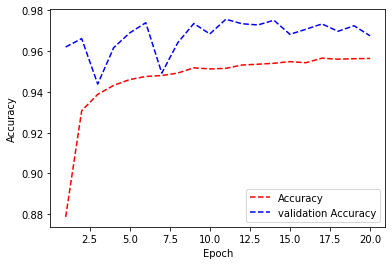

In [19]:
training_accuracy= history.history["accuracy"]
testing_accuracy= history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, testing_accuracy, "b--")
plt.legend(["Accuracy", "validation Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

# Importing more Libraries for accuracy scores 

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [21]:
predict_x=network.predict(feature_test) 
classes_x=np.argmax(predict_x,axis=1)
target = np.argmax(target_test, axis = 1)

In [26]:
print(f"Number of correct labels predicted : {(target == classes_x).sum()} out of {data_test.shape[0]}")

Number of correct labels predicted : 9675 out of 10000


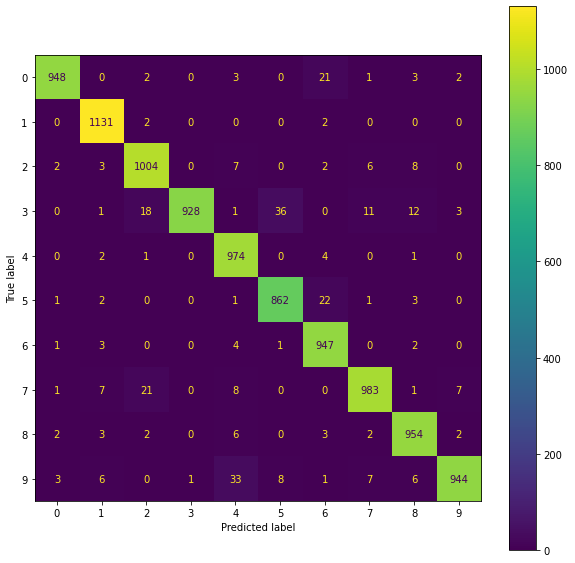

In [29]:
cm = confusion_matrix(target,classes_x)
cm_display = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [30]:
print(classification_report(target, classes_x))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.96      0.97      0.96      1032
           3       1.00      0.92      0.96      1010
           4       0.94      0.99      0.96       982
           5       0.95      0.97      0.96       892
           6       0.95      0.99      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [23]:
accuracy = accuracy_score(target, classes_x)
precision = precision_score(target, classes_x,average='weighted')
recall = recall_score(target, classes_x,average='macro')
f1 = f1_score(target, classes_x,average='micro')
print(f"Precision : {precision}")
print(f"Accuracy : {accuracy}")
print(f"Recall : {recall}")
print(f"F1 Accuracy : {f1}")

Precision : 0.96818744504179
Accuracy : 0.9675
Recall : 0.96735132087317
F1 Accuracy : 0.9675


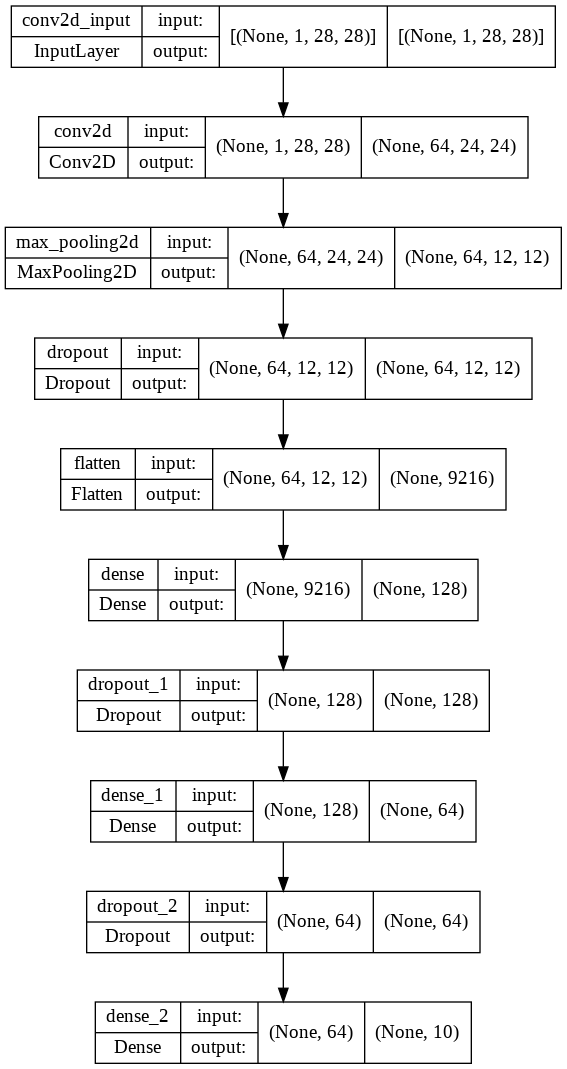

In [24]:
tf.keras.utils.plot_model(network, show_shapes=True)